In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/satya/Downloads/student_pass_fail.csv")

# Display basic information and the first few rows
df.head()

,Study Hours,Attendance,Pass
0,14.981605,63.085284,0
1,38.028572,62.348940,0
2,29.279758,95.312729,1
3,23.946339,62.477310,0
4,6.240746,63.597486,0


In [3]:
df.describe()

,Study Hours,Attendance,Pass
count,2000.000000,2000.000000,2000.000000
mean,19.945477,74.819519,0.312500
std,11.688432,14.428995,0.463628
min,0.128731,50.000582,0.000000
25%,9.521859,62.539338,0.000000
50%,20.294051,74.634716,0.000000
75%,30.027153,87.434525,1.000000
max,39.988707,99.977885,1.000000


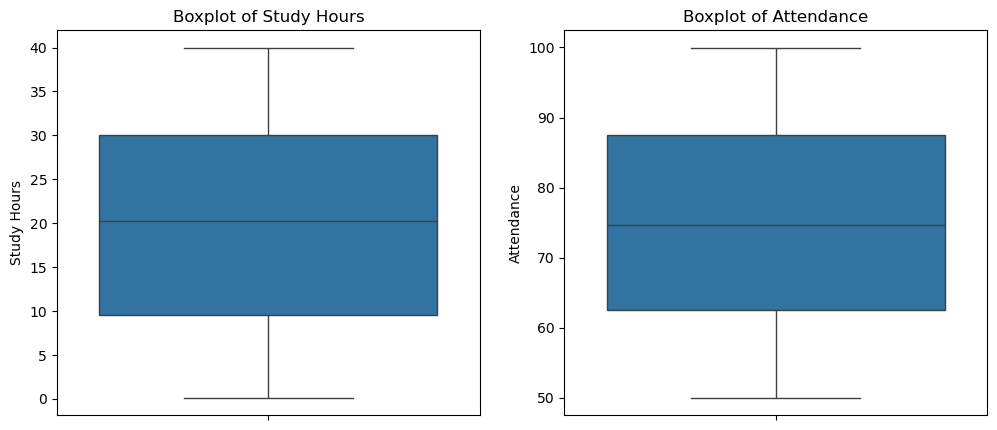

,Study Hours,Attendance,Pass
count,2000.000000,2000.000000,2000.000000
mean,19.945477,74.819519,0.312500
std,11.688432,14.428995,0.463628
min,0.128731,50.000582,0.000000
25%,9.521859,62.539338,0.000000
50%,20.294051,74.634716,0.000000
75%,30.027153,87.434525,1.000000
max,39.988707,99.977885,1.000000


In [4]:
# Summary statistics
summary_stats = df.describe()

# Visualizing distributions and potential outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Study Hours"])
plt.title("Boxplot of Study Hours")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Attendance"])
plt.title("Boxplot of Attendance")

plt.show()

summary_stats


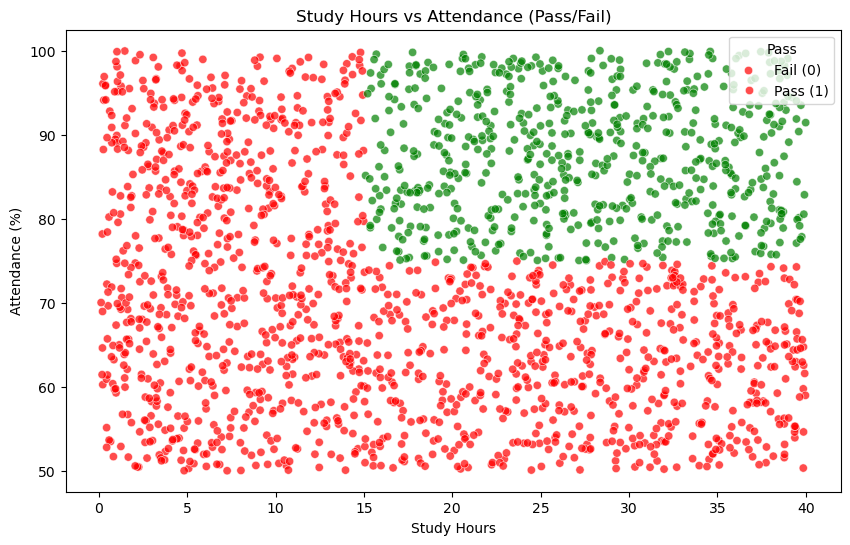

In [5]:
# Scatter plot to show the relationship between Study Hours, Attendance, and Pass status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Study Hours"], y=df["Attendance"], hue=df["Pass"], alpha=0.7, palette={0: "red", 1: "green"})
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.legend(title="Pass", labels=["Fail (0)", "Pass (1)"])
plt.show()


In [6]:
# Define features and target variable
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(0.9075,
 array([[246,  13],
        [ 24, 117]], dtype=int64))

## Sentiment analysis

In [9]:
# Load the dataset
df = pd.read_csv("C:/Users/satya/Downloads/reviews.csv")  # Change this path if needed
df.dropna(inplace=True)  # Remove null values

# Display the first few rows
print(df.head())

                                         Review Text Sentiment
0  Excellent customer service and fast delivery. ...  positive
1  Terrible experience. Completely disappointed w...  negative
2  Amazing experience! Will definitely purchase a...  positive
3  Not worth the money. Poor quality and bad serv...  negative
4  Fantastic quality and great value for money. H...  positive


In [10]:
nltk.download('punkt')        # Correct tokenizer model
nltk.download('punkt_tab')
nltk.download('stopwords')    # Stopwords list
nltk.download('wordnet')

# Step 3: Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize using correct punkt
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Step 4: Apply Preprocessing
df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)
print(df[['Review Text', 'Cleaned_Review']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         Review Text  \
0  Excellent customer service and fast delivery. ...   
1  Terrible experience. Completely disappointed w...   
2  Amazing experience! Will definitely purchase a...   
3  Not worth the money. Poor quality and bad serv...   
4  Fantastic quality and great value for money. H...   

                                      Cleaned_Review  
0  excellent customer service fast delivery satis...  
1  terrible experience completely disappointed pr...  
2             amazing experience definitely purchase  
3               worth money poor quality bad service  
4  fantastic quality great value money highly rec...  


In [11]:
# Step 5: Split Data
X = df['Cleaned_Review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       197
    positive       1.00      1.00      1.00       203

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



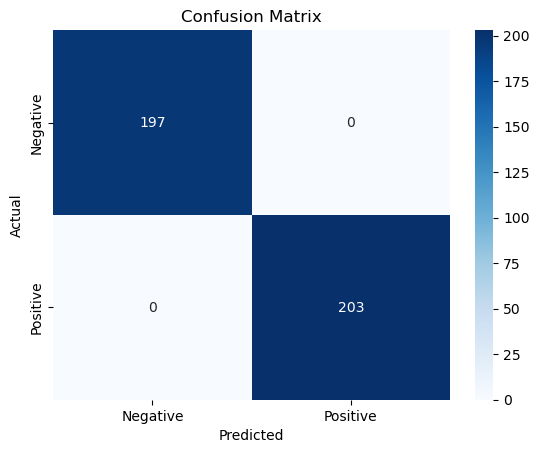

In [13]:
# Step 8: Predict on Test Data
y_pred = model.predict(X_test_tfidf)

# Step 9: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 10: Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Step 12: Correctly and Incorrectly Classified Examples
df_test = pd.DataFrame({'Review': X_test, 'Actual': y_test, 'Predicted': y_pred})
correct = df_test[df_test['Actual'] == df_test['Predicted']].head(5)
incorrect = df_test[df_test['Actual'] != df_test['Predicted']].head(5)

print("\nCorrectly Classified Examples:\n", correct)
print("\nIncorrectly Classified Examples:\n", incorrect)

# Step 13: Common words in Positive and Negative reviews
positive_reviews = df[df['Sentiment'] == 'positive']['Cleaned_Review']
negative_reviews = df[df['Sentiment'] == 'negative']['Cleaned_Review']

from collections import Counter

positive_words = Counter(" ".join(positive_reviews).split()).most_common(10)
negative_words = Counter(" ".join(negative_reviews).split()).most_common(10)

print("\nCommon Positive Words:\n", positive_words)
print("\nCommon Negative Words:\n", negative_words)



Correctly Classified Examples:
                                                Review    Actual Predicted
1860     best purchase ive made long time super happy  positive  positive
353              worth money poor quality bad service  negative  negative
1333             worth money poor quality bad service  negative  negative
905   horrible experience wish chosen different brand  negative  negative
1289        regret buying product didnt work expected  negative  negative

Incorrectly Classified Examples:
 Empty DataFrame
Columns: [Review, Actual, Predicted]
Index: []

Common Positive Words:
 [('purchase', 383), ('absolutely', 221), ('love', 221), ('product', 221), ('exceeded', 221), ('expectations', 221), ('excellent', 213), ('customer', 213), ('service', 213), ('fast', 213)]

Common Negative Words:
 [('product', 418), ('experience', 389), ('regret', 214), ('buying', 214), ('didnt', 214), ('work', 214), ('expected', 214), ('terrible', 204), ('completely', 204), ('disappointed', 204)]
